<a href="https://colab.research.google.com/github/ritika-kalyanshetti/Hands-on-ML/blob/main/HML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROGRAM TO SHOW IMPORTANT FEATURES IN A DECISION TREE
Number of Training samples
105
Number of Testing samples
45
Class of Testing Samples
[2 0 1 2 0 0 0 0 0 2 0 1 1 1 2 0 0 2 1 2 1 2 1 0 1 1 2 1 1 0 2 2 1 0 0 2 2
 0 2 0 1 2 2 2 1]
|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_0 <= 6.05
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.05
|   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |  

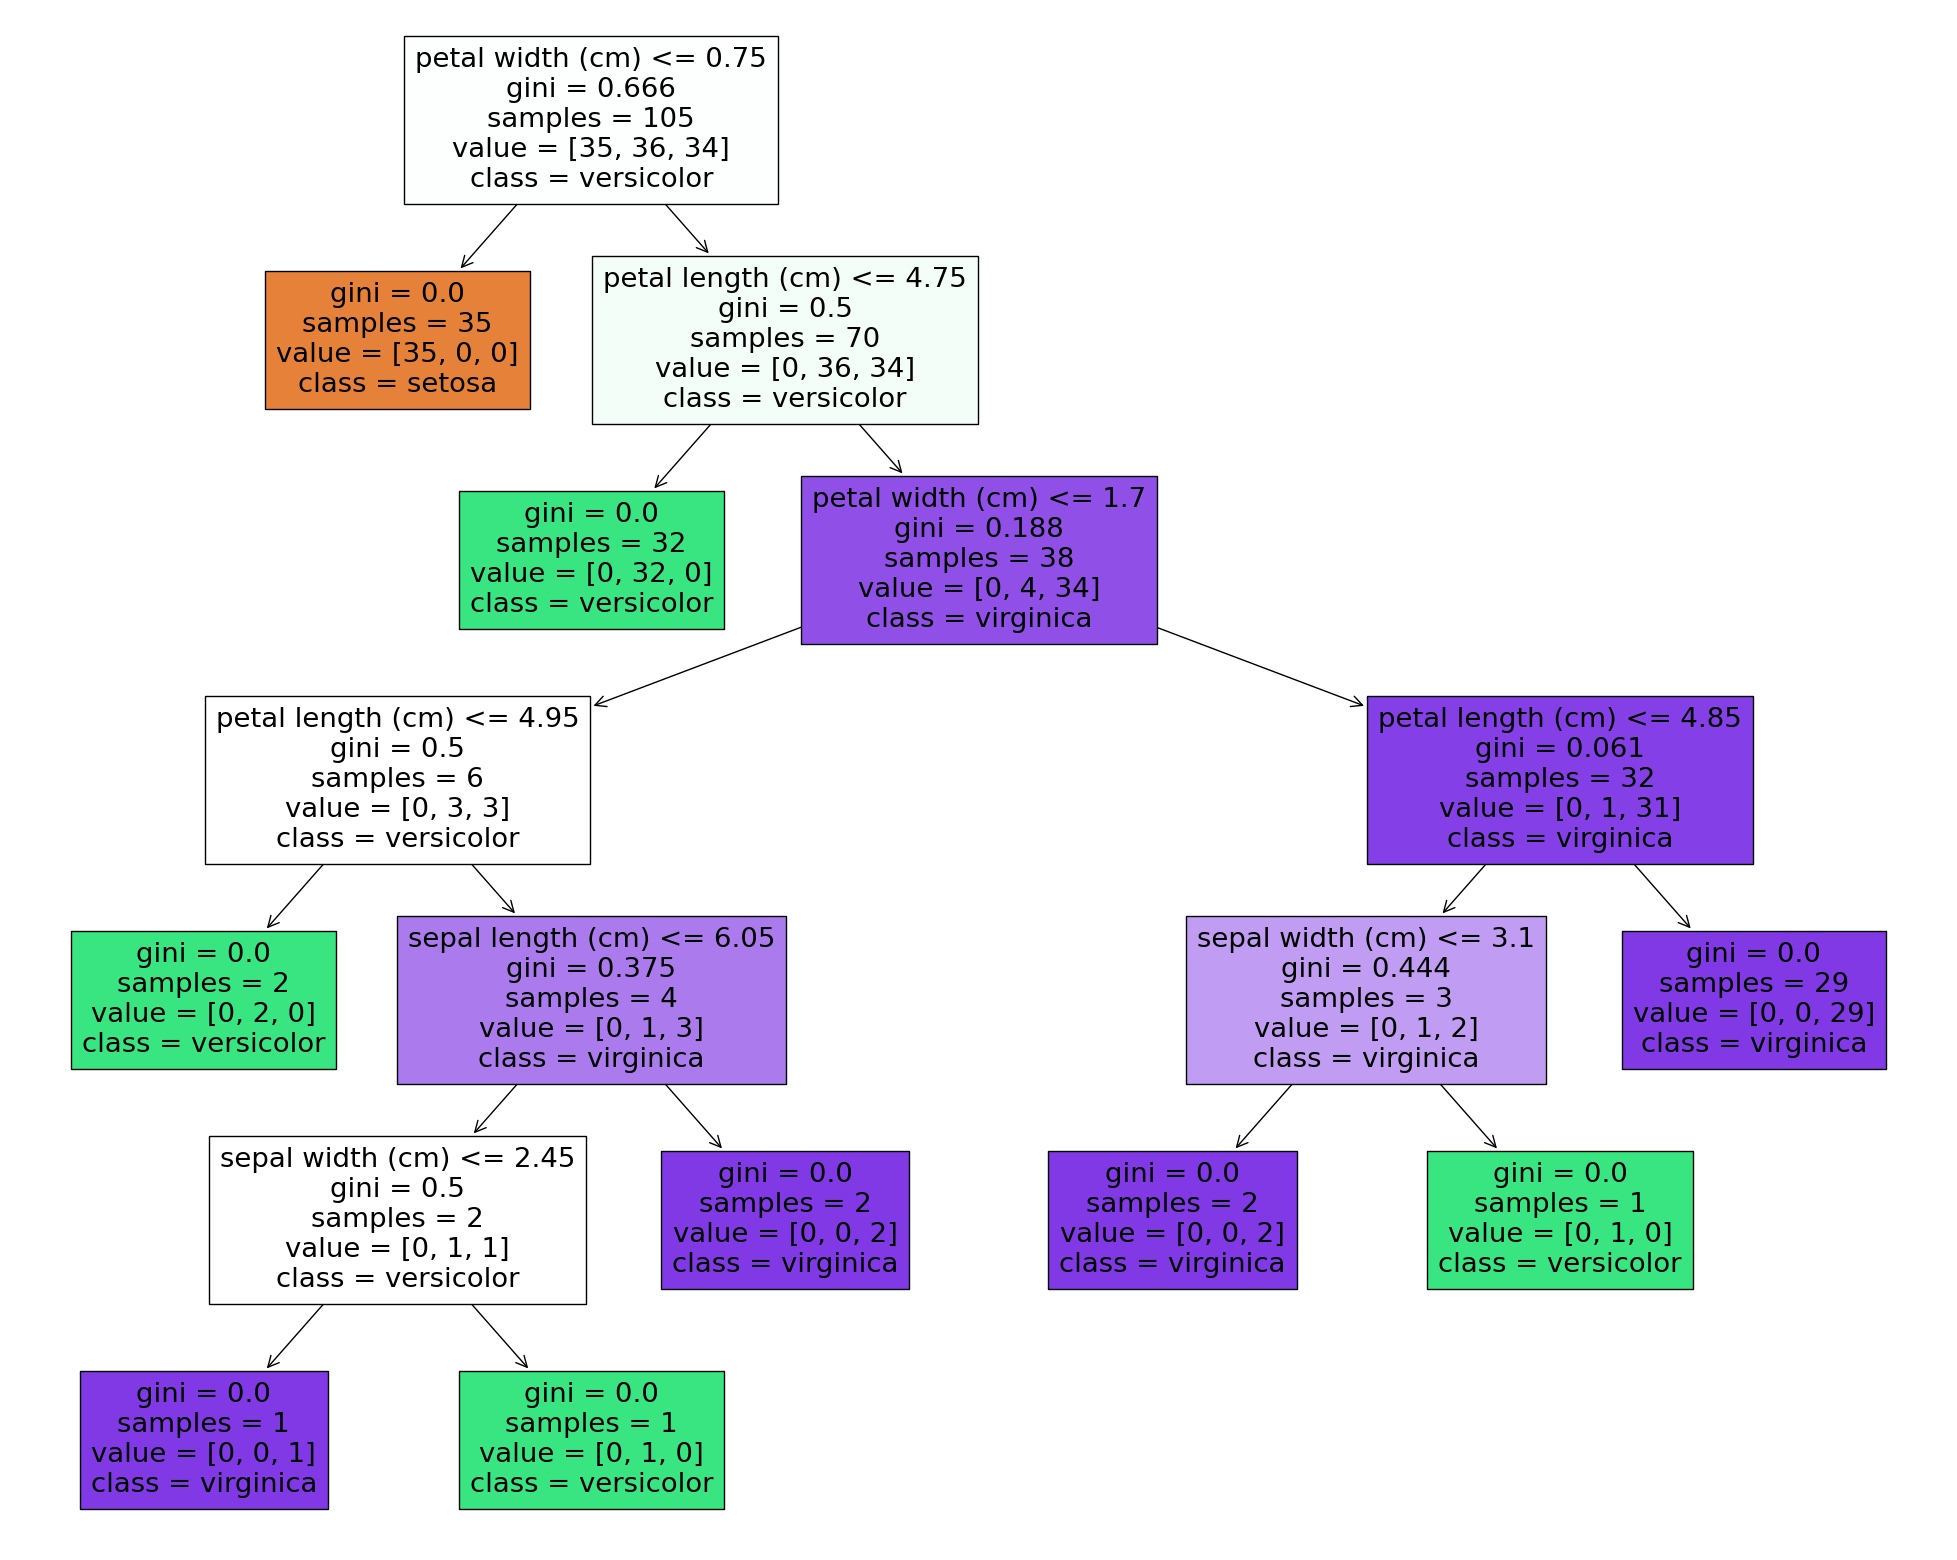

In [1]:
#6)	PROGRAM TO SHOW IMPORTANT FEATURES IN A DECISION TREE
#PROGRAM TO SHOW IMPORTANT FEATURES IN A DECISION TREE
print('PROGRAM TO SHOW IMPORTANT FEATURES IN A DECISION TREE')

from sklearn import datasets

import pandas as pd
iris=datasets.load_iris()

# df will fold dataset as a table
df=pd.DataFrame(
   iris.data,
   columns=iris.feature_names
   )
#labels are assigned to df[target] table or array
df['target']=pd.Series(
    iris.target
   )

from sklearn.model_selection import train_test_split

# Train Test Split Ratio
df_train,df_test=train_test_split(df,test_size=0.3)

df['target_names']=df['target'].apply(lambda y:iris.target_names[y])

print('Number of Training samples')
print(df_train.shape[0])

print('Number of Testing samples')
print(df_test.shape[0])

#Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

x_train=df_train[iris.feature_names]
x_test=df_test[iris.feature_names]

y_train=df_train['target']
y_test=df_test['target']

#Training Decision Tree Classifier
clf.fit(x_train,y_train)

#Testing the data
y_test_pred=clf.predict(x_test)

print('Class of Testing Samples')
print(y_test_pred)

#To display the decision tree in command shell
from sklearn.tree import export_text
from sklearn import tree
from matplotlib import pyplot as plt

text_representation = tree.export_text(clf)
print(text_representation)

#print(
#	export_text(clf,feature_names=iris.feature_names,spacing=3,decimals=1)
#	)

#To display the decision tree as a tree  in .png file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
           filled=True)

fig.savefig("decistion_tree.png")

## To show important features
print('\nTo show Important Features in a Decision Tree')
x=pd.DataFrame(
    {
        'feature_names':iris.feature_names,
        'feature_importances':clf.feature_importances_
        }
    ).sort_values(
        'feature_importances',ascending=False
        ).set_index('feature_names')
print(x)